<a href="https://colab.research.google.com/github/ngoantnut/data-science-by-Huy-teacher/blob/master/py_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read csv file and save to dataframe
df_covid = pd.read_csv("covid.csv")
df_covid

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [ ]:
# Tiền xử lý dữ liệu
df_covid.Recovered[df_covid.Recovered.isna()] = 0
df_covid["Date"] = pd.to_datetime(df_covid["Date"])
df_covid["Date"].dt.month

D:\download\ana\envs\Huan\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         1
1         1
2         1
3         1
4         1
         ..
231739    4
231740    4
231741    4
231742    4
231743    4
Name: Date, Length: 231744, dtype: int64

In [ ]:
# Input year and country
input_year = int(input("Nhập vào một năm từ 2019 đến 2022: "))
input_country = input("Nhập tên một nước bất kỳ: ")

In [ ]:
#df_covid[df_covid.Date.dt.is_month_end]
data_total_world = df_covid[((df_covid.Date.dt.year == input_year) & (df_covid.Date.dt.is_month_end))]

In [ ]:
# Declare 3 array
# In the world
world_confirmed = np.zeros(12, dtype=int)
world_recovered = np.zeros(12, dtype= int)
world_deaths = np.zeros(12, dtype= int)
world_not_recovered = np.zeros(12, dtype=int)

# In a country
country_confirmed = np.zeros(12, dtype=int)
country_recovered = np.zeros(12, dtype= int)
country_deaths = np.zeros(12, dtype= int)
country_not_recovered = np.zeros(12, dtype=int)

#in Viet Nam
vietnam_confirmed = np.zeros(12, dtype=int)
vietnam_deaths = np.zeros(12, dtype=int)



In [ ]:
for thang in range(12):
    # World
    data_thang = data_total_world[data_total_world.Date.dt.month == thang+1]
    world_confirmed[thang] = data_thang.Confirmed.sum()
    world_recovered[thang] = data_thang.Recovered.sum()
    world_deaths[thang] = data_thang.Deaths.sum()
    # Country
    country_confirmed[thang] = data_thang[data_thang["Country/Region"].str.lower() == input_country.lower()].Confirmed
    country_recovered[thang] = data_thang[data_thang["Country/Region"].str.lower() == input_country.lower()].Recovered
    country_deaths[thang] = data_thang[data_thang["Country/Region"].str.lower() == input_country.lower()].Deaths

    #vietnam
    vietnam_confirmed[thang] = data_thang[data_thang["Country/Region"] == "Vietnam"].Confirmed
    vietnam_deaths[thang] = data_thang[data_thang["Country/Region"] == "Vietnam"].Deaths

world_recovered
country_confirmed

array([   2,   16,  212,  270,  328,  355,  558, 1044, 1094, 1180, 1347,
       1465])

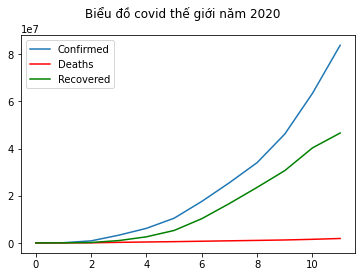

In [ ]:

plt.plot(world_confirmed, label = "Confirmed")
plt.plot(world_deaths, color ="red", label = "Deaths")
plt.plot(world_recovered, color = "green", label = "Recovered")

plt.suptitle('Biểu đồ covid thế giới năm '+ str(input_year))
plt.legend()

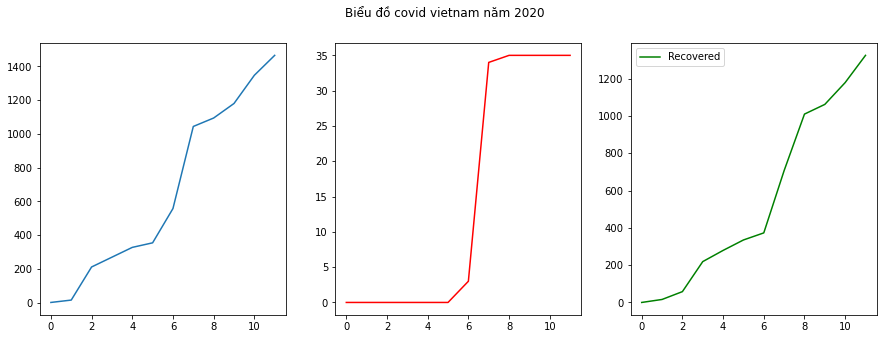

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize =(15,5))
ax1.plot(country_confirmed, label = "Confirmed")
ax2.plot(country_deaths, color ="red", label = "Deaths")
ax3.plot(country_recovered, color = "green", label = "Recovered")

plt.suptitle('Biểu đồ covid '+input_country+' năm '+ str(input_year))
plt.legend()

In [ ]:
data_vietnam = df_covid[df_covid["Country/Region"]=="Vietnam"]
data_confirmed_vietnam_by_year = []
data_recovered_vietnam_by_year = []
data_deaths_vietnam_by_year = []
for nam in data_vietnam.Date.dt.year.unique():
    print(nam)
    data_confirmed = data_vietnam[data_vietnam.Date.dt.year == nam].Confirmed.max()
    data_recovered = data_vietnam[data_vietnam.Date.dt.year == nam].Recovered.max()
    data_deaths = data_vietnam[data_vietnam.Date.dt.year == nam].Deaths.max()

    data_confirmed_vietnam_by_year.append(data_confirmed)
    data_recovered_vietnam_by_year.append(data_recovered)
    data_deaths_vietnam_by_year.append(data_deaths)



2020
2021
2022


[2020 2021 2022]


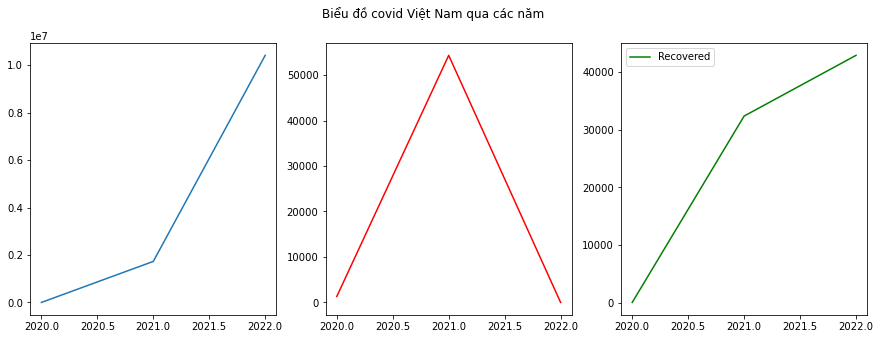

In [ ]:
years = data_vietnam.Date.dt.year.unique()
print(years)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize =(15,5))
ax1.plot(years,data_confirmed_vietnam_by_year, label = "Confirmed")
ax2.plot(years,data_recovered_vietnam_by_year, color ="red", label = "Deaths")
ax3.plot(years,data_deaths_vietnam_by_year, color = "green", label = "Recovered")

plt.suptitle('Biểu đồ covid Việt Nam qua các năm ')
plt.legend()

In [ ]:
print(vietnam_confirmed)
data_confirmed = np.roll(vietnam_confirmed,1)
data_confirmed[0] = 0
vietnam_confirmed -= data_confirmed
max_val = vietnam_confirmed.max()
max_index = np.where(vietnam_confirmed == max_val)
print(max_index)

[   2   16  212  270  328  355  558 1044 1094 1180 1347 1465]
(array([7], dtype=int64),)


In [ ]:
print(vietnam_deaths)
dat_deaths = np.roll(vietnam_deaths,1)
dat_deaths[0] = 0
vietnam_deaths -= dat_deaths
min_val = vietnam_deaths.min()
min_index= np.where(vietnam_deaths==min_val)
print(min_index)

[ 0  0  0  0  0  0  3 34 35 35 35 35]
(array([ 0,  1,  2,  3,  4,  5,  9, 10, 11], dtype=int64),)
